# New York City Taxi Fare Prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers. 

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction


## 1. Download the Dataset

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas



Dataset link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview



### Install Required Libraries

In [2]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

In [3]:
import jovian

In [5]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Download Data from Kaggle

We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [6]:
import opendatasets as od

In [7]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [8]:
%%time
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:15<00:00, 111MB/s] 



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 46.9 s, sys: 13.1 s, total: 60 s
Wall time: 2min 19s


In [9]:
data_dir = './new-york-city-taxi-fare-prediction'

### View Dataset Files

In [10]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Nov 19 10:06 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Nov 19 10:06 sample_submission.csv
-rw-r--r-- 1 root root 960K Nov 19 10:06 test.csv
-rw-r--r-- 1 root root 5.4G Nov 19 10:08 train.csv


In [11]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [12]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [13]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [14]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [15]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [16]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [18]:
import pandas as pd
import random

In [19]:
# Change this
sample_frac = 0.01

In [20]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 2min 14s, sys: 1.61 s, total: 2min 15s
Wall time: 2min 16s


**Exercise**: Try loading 3%, 10%, 30% and 100% of the data.

In [21]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


### Load Test Set

For the test set, we'll simply provide the data types.

In [22]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [23]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [24]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [26]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354463,-72.288383,39.830513,-72.295395,39.934257,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.255058,1.341986
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [27]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0 
- `passenger_count` ranges from 0 to 208 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.


### Test Set

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [29]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [30]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [31]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Exploratory Data Analysis and Visualization

**Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



### Ask & Answer Questions

**Exercise**: Ask & answer questions about the dataset: 

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?

EDA + asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.

Resources for exploratory analysis & visualization:

- EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
- Data Analysis with Python: https://zerotopandas.com

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns-6l3/nyc-taxi-fare-prediction-filled


'https://jovian.ai/aakashns-6l3/nyc-taxi-fare-prediction-filled'

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [34]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [35]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [36]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [37]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [38]:
target_col = 'fare_amount'

#### Training

In [39]:
train_inputs = train_df[input_cols]

In [40]:
train_targets = train_df[target_col]

In [41]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [42]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

#### Validation

In [43]:
val_inputs = val_df[input_cols]

In [44]:
val_targets = val_df[target_col]

In [45]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [46]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [47]:
test_inputs = test_df[input_cols]

In [48]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [49]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [50]:
import numpy as np

In [51]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [52]:
mean_model = MeanRegressor()

In [53]:
mean_model.fit(train_inputs, train_targets)

In [54]:
mean_model.mean

11.354591369628906

In [55]:
train_preds = mean_model.predict(train_inputs)

In [56]:
train_preds

array([11.35459137, 11.35459137, 11.35459137, ..., 11.35459137,
       11.35459137, 11.35459137])

In [57]:
val_preds = mean_model.predict(val_inputs)

In [58]:
val_preds

array([11.35459137, 11.35459137, 11.35459137, ..., 11.35459137,
       11.35459137, 11.35459137])

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [62]:
train_rmse

9.78978199423857

In [63]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [64]:
val_rmse

9.899954151552434

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

In [65]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
linreg_model = LinearRegression()

In [68]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [69]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [70]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [71]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.78863266989743

In [72]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

The linear regression model is off by $9.898, which isn't much better than simply predicting the average. 

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

In [73]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [74]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [75]:
test_preds = linreg_model.predict(test_inputs)

In [76]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [77]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [78]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [79]:
generate_submission(test_preds, 'linreg_submission.csv')

![](https://i.imgur.com/DfCLCrE.png)

In [80]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [81]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [82]:
add_dateparts(train_df, 'pickup_datetime')

In [83]:
add_dateparts(val_df, 'pickup_datetime')

In [84]:
add_dateparts(test_df, 'pickup_datetime')

In [85]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


In [86]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [87]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [88]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [89]:
%%time
add_trip_distance(train_df)

CPU times: user 85.7 ms, sys: 10.4 ms, total: 96 ms
Wall time: 84.9 ms


In [90]:
add_trip_distance(val_df)

In [91]:
add_trip_distance(test_df)

In [92]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
174319,7.5,2012-09-28 02:28:00+00:00,-73.998238,40.760975,-73.980133,40.746628,2.0,2012,9,28,4,2,2.205229
240414,13.5,2014-05-17 13:27:00+00:00,-73.949791,40.774517,-73.938766,40.804800,3.0,2014,5,17,5,13,3.490528
161085,4.5,2011-08-04 23:50:00+00:00,-73.981117,40.778664,-73.977745,40.773895,1.0,2011,8,4,3,23,0.601256
322288,6.5,2011-05-31 20:15:00+00:00,-73.971191,40.755264,-73.965614,40.767743,2.0,2011,5,31,1,20,1.463921
249851,17.5,2013-11-10 06:42:00+00:00,-73.987358,40.718166,-73.911629,40.699782,1.0,2013,11,10,6,6,6.698061


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [93]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [94]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [95]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 398 ms, sys: 14 ms, total: 412 ms
Wall time: 349 ms


In [96]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
319069,5.3,2009-05-04 15:08:00+00:00,-73.959724,40.770798,-73.957405,40.782823,5.0,2009,5,4,0,15,1.350721,21.804565,7.049003,21.016697,0.618473,8.968103
252549,10.0,2014-11-27 15:07:00+00:00,-74.001793,40.745880,-74.010986,40.716990,2.0,2014,11,27,3,15,3.302362,21.352753,13.316392,14.109573,8.017707,0.496361
447188,10.9,2012-04-25 12:34:00+00:00,-73.974075,40.752457,-73.984795,40.750382,3.0,2012,4,25,2,12,0.931148,21.217988,9.779709,17.350925,3.701525,4.700781
436305,5.0,2013-03-23 23:45:58+00:00,-74.013168,40.717045,-74.005280,40.711405,1.0,2013,3,23,5,23,0.913480,20.670231,13.233615,14.462857,8.345159,0.411408
185715,4.1,2010-07-21 10:06:00+00:00,-73.991631,40.745731,-73.997963,40.741220,1.0,2010,7,21,2,10,0.731866,21.598090,11.162197,15.941587,5.153865,3.335513


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [97]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354591,-72.521378,39.993584,-72.531738,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147875,182.365273,191.412174,177.416148,178.902047
std,9.788187,11.826187,8.449581,12.422503,9.857420,1.341967,1.857024,3.434881,8.697374,1.950033,6.517710,371.299304,1223.614849,1226.672157,1228.515198,1228.388579,1228.487273
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305642,0.116301,0.129386,0.031193,0.009434
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535070,8.351047,16.502686,2.169940,3.642443
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.201963,9.575653,18.016199,3.818118,5.559601
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948147,11.122147,19.953155,6.071872,7.814486
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444911,15057.674682,15074.643090,15074.714521,15077.613266,15072.109458


In [98]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042799,0.033542,0.039093,0.035435,1.278756,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [99]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [100]:
train_df = remove_outliers(train_df)

In [101]:
val_df = remove_outliers(val_df)

### Scaling and One-Hot Encoding

**Exercise**: Try scaling numeric columns to the `(0,1)` range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.


In [102]:
train_df.to_parquet('train.parquet')

In [103]:
val_df.to_parquet('val.parquet')

In [104]:
test_df.to_parquet('test.parquet')

In [105]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [106]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [107]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [108]:
target_col = 'fare_amount'

In [109]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [110]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [111]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [112]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [113]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [114]:
from sklearn.linear_model import Ridge

In [115]:
model1 = Ridge(random_state=42)

In [116]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 88.8 ms, sys: 76.3 ms, total: 165 ms
Wall time: 171 ms


Ridge(random_state=42)

In [117]:
evaluate(model1)

(5.049312317000487,
 5.2178626417396785,
 array([ 8.12925371,  4.11620874,  8.75052819, ..., 10.47183254,
         8.23056739, 10.58672113]),
 array([10.91967394,  6.20497794, 46.21796772, ...,  8.04641068,
        25.56892235,  8.45304255]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [118]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081611
1,2015-01-27 13:08:24.0000003,11.399414
2,2011-10-08 11:53:44.0000002,5.356701
3,2012-12-01 21:12:12.0000002,8.763753
4,2012-12-01 21:12:12.0000003,14.609945
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024972
9910,2015-01-12 17:05:51.0000001,11.218112
9911,2015-04-19 20:44:15.0000001,47.926206
9912,2015-01-31 01:05:19.0000005,22.600095


![](https://i.imgur.com/aMAFpbH.png)

We were able to get to a position of around 1100

In [119]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [122]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 5min 7s, sys: 438 ms, total: 5min 8s
Wall time: 2min 37s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [123]:
evaluate(model2)

(3.5978768922789985,
 4.162960672409108,
 array([ 7.04562027,  9.16841263,  9.10837664, ..., 10.3855101 ,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33097815,
        29.15652571,  8.2638333 ]))

In [124]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.507307
1,2015-01-27 13:08:24.0000003,10.507307
2,2011-10-08 11:53:44.0000002,5.052403
3,2012-12-01 21:12:12.0000002,8.466582
4,2012-12-01 21:12:12.0000003,14.344346
...,...,...
9909,2015-05-10 12:37:51.0000002,8.835443
9910,2015-01-12 17:05:51.0000001,12.520002
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.551546


![](https://i.imgur.com/jyMniFW.png)

This puts us at position 573 out of 1483 i.e. top 40%, which is already a really good score. 

Remember that we're only using 1% of the data, and we haven't done much hyperparameter tuning yet.

In [125]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [126]:
from xgboost import XGBRegressor

In [127]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [128]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 1min 16s, sys: 405 ms, total: 1min 16s
Wall time: 40.1 s


XGBRegressor(n_jobs=-1, objective='reg:squarederror', random_state=42)

In [129]:
evaluate(model3)

(3.877436,
 4.221876,
 array([ 6.7849793,  9.058503 ,  9.647087 , ..., 10.247599 ,  8.154804 ,
        10.189585 ], dtype=float32),
 array([12.434115 ,  6.3510723, 47.742447 , ...,  8.108994 , 29.701584 ,
         8.555203 ], dtype=float32))

In [130]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.225535
1,2015-01-27 13:08:24.0000003,10.585104
2,2011-10-08 11:53:44.0000002,5.101507
3,2012-12-01 21:12:12.0000002,8.199709
4,2012-12-01 21:12:12.0000003,14.573348
...,...,...
9909,2015-05-10 12:37:51.0000002,8.872149
9910,2015-01-12 17:05:51.0000001,11.904490
9911,2015-04-19 20:44:15.0000001,52.787853
9912,2015-01-31 01:05:19.0000005,21.513876


![](https://i.imgur.com/GIC08hz.png)

This submission isn't as good as the random forest, but there's scope for improvement with Hyperparameter tuning.

In [131]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled


'https://jovian.ai/shubhambalodi79/nyc-taxi-fare-prediction-filled'

## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [132]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [133]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 11min 1s, sys: 1.58 s, total: 11min 3s
Wall time: 5min 39s


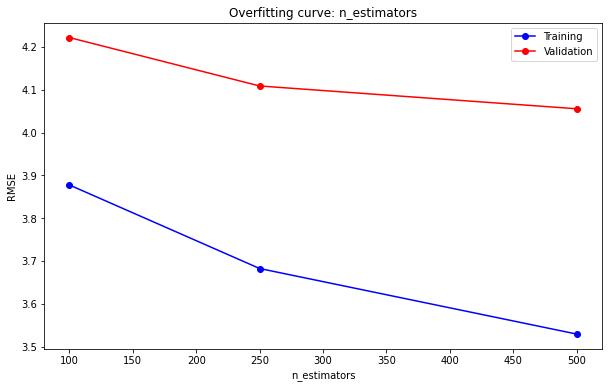

In [134]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [135]:
best_params['n_estimators'] = 250

### Max Depth

CPU times: user 13min 19s, sys: 1.85 s, total: 13min 21s
Wall time: 6min 50s


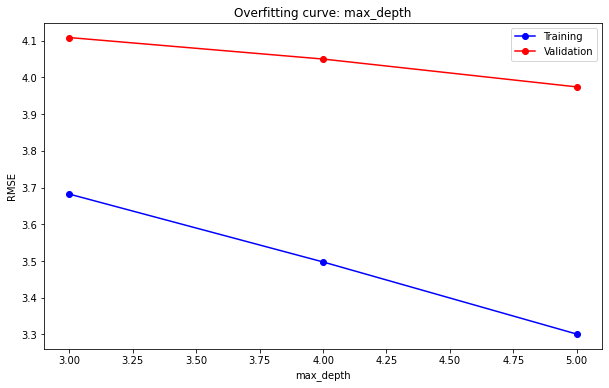

In [136]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

In [137]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 16min 59s, sys: 2.53 s, total: 17min 2s
Wall time: 8min 43s


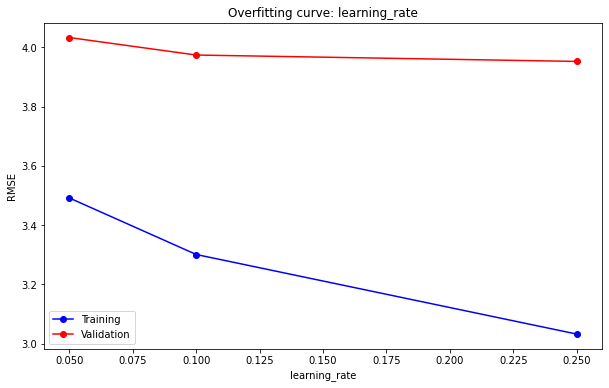

In [138]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [139]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters. 

Here's a set of parameters that works well:

In [140]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [141]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 8min 21s, sys: 1.31 s, total: 8min 23s
Wall time: 4min 21s


XGBRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=500, n_jobs=-1,
             objective='reg:squarederror', random_state=42, subsample=0.8)

In [ ]:
evaluate(xgb_model_final)

In [ ]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

![](https://i.imgur.com/rm51wKD.png)

This puts us at the 460th position out of 1483 i.e. top 30%. This is pretty amazing considering:

- We are using just 1% of the training data
- We are only using a single model (most top submissions use ensembles)
- Our best model takes just 10 minutes to train (as oppposed to hours/days)
- We haven't fully optimized the hyperparameters yet

Let's save the weights of this model. Follow this guide: https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns-6l3/nyc-taxi-fare-prediction-filled


'https://jovian.ai/aakashns-6l3/nyc-taxi-fare-prediction-filled'

**Exercises**: 

1. Tune hyperparameters for Linear Regression & random forests.
2. Repeat with 3%, 10%, 30% and 100% of the training set. How much reduction in error does 100x more data produce?
3. Ensemble (average) the results from multiple models and observe if they're better than individual models.

### Save Outputs to Google Drive (Optional)

We can save all the output files we've created to Google Drive, so that we can reuse them later if required.

Follow this guide: https://colab.research.google.com/notebooks/io.ipynb

## 9. Train on GPU with entire dataset (Optional)

Steps:
- Install `dask`, `cudf` and `cuml`
- Load the dataset to GPU
- Create training and validation set
- Perform feature engineering
- Train XGBoost `cuml` model
- Make predictions & submit

Follow these guides and fill out the empty cells below:
- https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
- https://jovian.ai/allenkong221/nyc-taxi-fare-rapids-dask-gpu/v/1?utm_source=embed#C10

### Install `dask`, `cudf` and `cuml`

### Load the data

### Create training & validation set

### Perform feature engineering

### Train XGBoost model on GPU

### Make Predictions & Submit

## 10. Document & Publish Your Work

- Add explanations using Markdown
- Clean up the code & create functions
- Publish notebook to Jovian
- Write a blog post and embed

Follow this guide: https://www.youtube.com/watch?v=NK6UYg3-Bxs 

## References

* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets 
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance 
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24 
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com 
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet 
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components 
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula 
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas 
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs 
* Examples of Machine Learning Projects:
    * Walmart Store Sales: https://jovian.ai/anushree-k/final-walmart-simple-rf-gbm
    * Used Car Price Prediction: https://jovian.ai/kara-mounir/used-cars-prices 
    * Lithology Prediction: https://jovian.ai/ramysaleem/ml-project-machine-predicting-lithologies
    * Ad Demand Prediction: https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj 

